### Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib2
import json
import datetime
import csv
import time

### Input Access Credentials

In [2]:
app_id = "606162786238092"
app_secret = "222b1cc38b2d462d4da6f2c3ba0e7e1a" 

access_token = app_id + "|" + app_secret

### FB Page Url Name ("https://www.facebook.com/wsj/")

In [3]:
page_id = 'wsj'

### Request Url

In [4]:
def request_until_succeed(url):
    req = urllib2.Request(url)
    check = False
    
    while check is False:
        
        try: 
            response = urllib2.urlopen(req)
            if response.getcode() == 200:
                check = True
        
        except Exception, e:
            print str(e)
            time.sleep(5)
            
            print "URL Error: {}".format(url)

    return response.read()

### Load Data From Url

In [5]:
def test_FB_Page_Feed(page_id, access_token):
    
    base_url = "https://graph.facebook.com/v2.4"
    node = "/" + page_id + "/feed" 
    parameters = "/?access_token=%s" % access_token
    url = base_url + node + parameters
    
    data = json.loads(request_until_succeed(url))
    
    print json.dumps(data, indent=2, sort_keys=True)
    

test_FB_Page_Feed(page_id, access_token)

{
  "data": [
    {
      "created_time": "2017-02-12T05:10:07+0000", 
      "id": "8304333127_10155441769333128", 
      "message": "Japanese Prime Minister Shinzo Abe, in an appearance with President Donald Trump, condemned a North Korean missile launch as \u201cabsolutely intolerable.\u201d"
    }, 
    {
      "created_time": "2017-02-12T05:00:15+0000", 
      "id": "8304333127_10155441632338128", 
      "message": "Shipbuilding was until recently a symbol of China\u2019s industrial might. Now shipyards across China are being driven out of business by weak global demand for new ships."
    }, 
    {
      "created_time": "2017-02-12T04:00:34+0000", 
      "id": "8304333127_10155441506163128", 
      "message": "President Donald Trump pressed ahead with his immigration crackdown, launching deportation raids targeting undocumented immigrants in the U.S."
    }, 
    {
      "created_time": "2017-02-12T03:00:48+0000", 
      "id": "8304333127_10155441310883128", 
      "message": "\u2

### Load Relevant Data (Summarized)

In [6]:
def parse_FB_Page_Feed(page_id, access_token, num_statuses):
    
    base_url = "https://graph.facebook.com"
    node = "/" + page_id + "/feed" 
    parameters = "/?fields=message,link,likes.limit(1),comments.limit(1),shares&limit={}&access_token={}".format(num_statuses,access_token) 
    url = base_url + node + parameters
    
    data = json.loads(request_until_succeed(url))
    
    return data

first_status = parse_FB_Page_Feed(page_id, access_token, 10)["data"][0]
print json.dumps(first_status, indent=2, sort_keys=True)

{
  "comments": {
    "data": [
      {
        "created_time": "2017-02-12T05:49:02+0000", 
        "from": {
          "id": "10202744543971110", 
          "name": "Ray Harris"
        }, 
        "id": "10155441769333128_10155441839263128", 
        "message": "So, what happened to the U.S. closing shop and having Japan go at it alone.  \"America first.\"   Our country is at the mercy of an imbecile."
      }
    ], 
    "paging": {
      "cursors": {
        "after": "MzcZD", 
        "before": "MzcZD"
      }, 
      "next": "https://graph.facebook.com/v2.8/8304333127_10155441769333128/comments?access_token=606162786238092%7C222b1cc38b2d462d4da6f2c3ba0e7e1a&limit=1&after=MzcZD"
    }
  }, 
  "id": "8304333127_10155441769333128", 
  "likes": {
    "data": [
      {
        "id": "1432365356797418", 
        "name": "Jerry Saldy"
      }
    ], 
    "paging": {
      "cursors": {
        "after": "MTQzMjM2NTM1Njc5NzQxOAZDZD", 
        "before": "MTQzMjM2NTM1Njc5NzQxOAZDZD"
      },

### Scrape Top 25 Posts   

In [7]:
statuses = parse_FB_Page_Feed(page_id, access_token, 5)["data"]

### Convert To Dataframe

In [8]:
df = pd.DataFrame(statuses)
df

,comments,id,likes,link,message,shares
0,"{u'paging': {u'cursors': {u'after': u'MzcZD', ...",8304333127_10155441769333128,{u'paging': {u'cursors': {u'after': u'MTQzMjM2...,http://on.wsj.com/2kjexF8,"Japanese Prime Minister Shinzo Abe, in an appe...",{u'count': 31}
1,"{u'paging': {u'cursors': {u'after': u'MwZDZD',...",8304333127_10155441632338128,{u'paging': {u'cursors': {u'after': u'MTY0OTIw...,http://on.wsj.com/2kP7zcY,Shipbuilding was until recently a symbol of Ch...,{u'count': 9}
2,"{u'paging': {u'cursors': {u'after': u'NTkZD', ...",8304333127_10155441506163128,{u'paging': {u'cursors': {u'after': u'MTAxMDE3...,http://on.wsj.com/2kFLiA0,President Donald Trump pressed ahead with his ...,{u'count': 158}
3,"{u'paging': {u'cursors': {u'after': u'MwZDZD',...",8304333127_10155441310883128,{u'paging': {u'cursors': {u'after': u'MTAxNTQ1...,http://on.wsj.com/2kbfjnH,“A person can only learn from real work experi...,{u'count': 8}
4,"{u'paging': {u'cursors': {u'after': u'MTYZD', ...",8304333127_10155440870543128,{u'paging': {u'cursors': {u'after': u'NzM0NTA3...,http://on.wsj.com/2kfh9sD,Two lawyers have ignited a family feud among P...,{u'count': 14}


### Extract Comments Text

In [9]:
df['shares'] = df['shares'].map(lambda x: x.values()[0])
df.head()

,comments,id,likes,link,message,shares
0,"{u'paging': {u'cursors': {u'after': u'MzcZD', ...",8304333127_10155441769333128,{u'paging': {u'cursors': {u'after': u'MTQzMjM2...,http://on.wsj.com/2kjexF8,"Japanese Prime Minister Shinzo Abe, in an appe...",31
1,"{u'paging': {u'cursors': {u'after': u'MwZDZD',...",8304333127_10155441632338128,{u'paging': {u'cursors': {u'after': u'MTY0OTIw...,http://on.wsj.com/2kP7zcY,Shipbuilding was until recently a symbol of Ch...,9
2,"{u'paging': {u'cursors': {u'after': u'NTkZD', ...",8304333127_10155441506163128,{u'paging': {u'cursors': {u'after': u'MTAxMDE3...,http://on.wsj.com/2kFLiA0,President Donald Trump pressed ahead with his ...,158
3,"{u'paging': {u'cursors': {u'after': u'MwZDZD',...",8304333127_10155441310883128,{u'paging': {u'cursors': {u'after': u'MTAxNTQ1...,http://on.wsj.com/2kbfjnH,“A person can only learn from real work experi...,8
4,"{u'paging': {u'cursors': {u'after': u'MTYZD', ...",8304333127_10155440870543128,{u'paging': {u'cursors': {u'after': u'NzM0NTA3...,http://on.wsj.com/2kfh9sD,Two lawyers have ignited a family feud among P...,14


In [10]:
for i in df['comments']:
    print i['data'][0]['message']
    print '\n'

So, what happened to the U.S. closing shop and having Japan go at it alone.  "America first."   Our country is at the mercy of an imbecile.


Well if there is a downturn because of this in the Chinese economy it would then slow down their military ambitions in the South China Sea


"Raids?" They are locating and deporting known felons, already marked for deportation. There are some undocumented individuals also identified with them, but not targeted. Catagorizing this action as raids or sweeps is inaccurate, and I think inflammatory.


<3 <3 YES!! I finally found the Official link to watch Movies
Fifty Shades Darker (2017) 
 http://donwori.tk/11/26/10/1991/full.php?movie=tt4465564&sub=Fifty446556


He should have put together a trust. When you are that wealthy , it's plain irresponsible not to put a plan together for what is to happen with your assets if you become incapacitated or die.




In [11]:
df['comments'] = df['comments'].apply(lambda x: str(x.values()[1][0]['message']))

In [12]:
df.head()

,comments,id,likes,link,message,shares
0,"So, what happened to the U.S. closing shop and...",8304333127_10155441769333128,{u'paging': {u'cursors': {u'after': u'MTQzMjM2...,http://on.wsj.com/2kjexF8,"Japanese Prime Minister Shinzo Abe, in an appe...",31
1,Well if there is a downturn because of this in...,8304333127_10155441632338128,{u'paging': {u'cursors': {u'after': u'MTY0OTIw...,http://on.wsj.com/2kP7zcY,Shipbuilding was until recently a symbol of Ch...,9
2,"""Raids?"" They are locating and deporting known...",8304333127_10155441506163128,{u'paging': {u'cursors': {u'after': u'MTAxMDE3...,http://on.wsj.com/2kFLiA0,President Donald Trump pressed ahead with his ...,158
3,<3 <3 YES!! I finally found the Official link ...,8304333127_10155441310883128,{u'paging': {u'cursors': {u'after': u'MTAxNTQ1...,http://on.wsj.com/2kbfjnH,“A person can only learn from real work experi...,8
4,He should have put together a trust. When you ...,8304333127_10155440870543128,{u'paging': {u'cursors': {u'after': u'NzM0NTA3...,http://on.wsj.com/2kfh9sD,Two lawyers have ignited a family feud among P...,14


### Wordcloud (Comments)

In [16]:
from wordcloud import WordCloud,STOPWORDS
words_comments = (' '.join(list(df['comments'])))

In [17]:
words_comments

'So, what happened to the U.S. closing shop and having Japan go at it alone.  "America first."   Our country is at the mercy of an imbecile. Well if there is a downturn because of this in the Chinese economy it would then slow down their military ambitions in the South China Sea "Raids?" They are locating and deporting known felons, already marked for deportation. There are some undocumented individuals also identified with them, but not targeted. Catagorizing this action as raids or sweeps is inaccurate, and I think inflammatory. <3 <3 YES!! I finally found the Official link to watch Movies\nFifty Shades Darker (2017) \n http://donwori.tk/11/26/10/1991/full.php?movie=tt4465564&sub=Fifty446556 He should have put together a trust. When you are that wealthy , it\'s plain irresponsible not to put a plan together for what is to happen with your assets if you become incapacitated or die.'

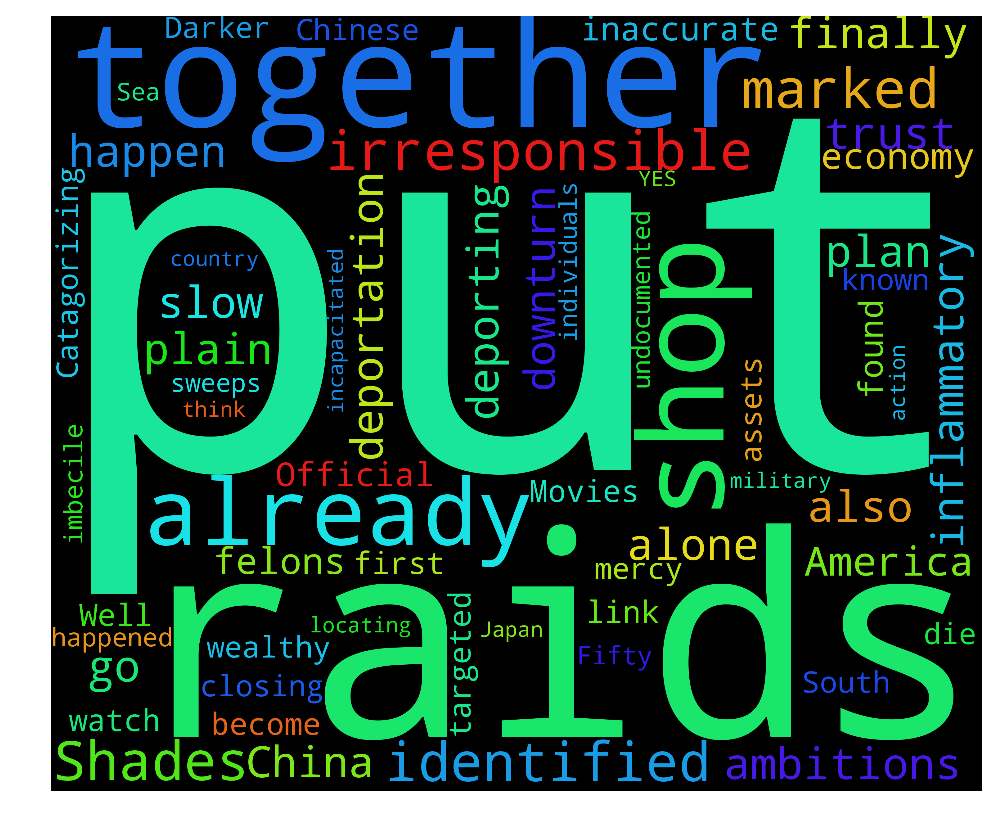

In [18]:
cleaned_word = " ".join([word for word in words_comments.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Wordcloud (Statuses)

In [19]:
from wordcloud import WordCloud,STOPWORDS
words_statuses = (' '.join(list(df['message'])))

In [20]:
words_statuses

u"Japanese Prime Minister Shinzo Abe, in an appearance with President Donald Trump, condemned a North Korean missile launch as \u201cabsolutely intolerable.\u201d Shipbuilding was until recently a symbol of China\u2019s industrial might. Now shipyards across China are being driven out of business by weak global demand for new ships. President Donald Trump pressed ahead with his immigration crackdown, launching deportation raids targeting undocumented immigrants in the U.S. \u201cA person can only learn from real work experience. If a woman stays on leave or a reduced schedule for a long period, it could be difficult to let her take any responsible job.\u201d Two lawyers have ignited a family feud among Prince's heirs over issues including the singer\u2019s legacy, a memorial concert and the advisers\u2019 own conflicts of interest."

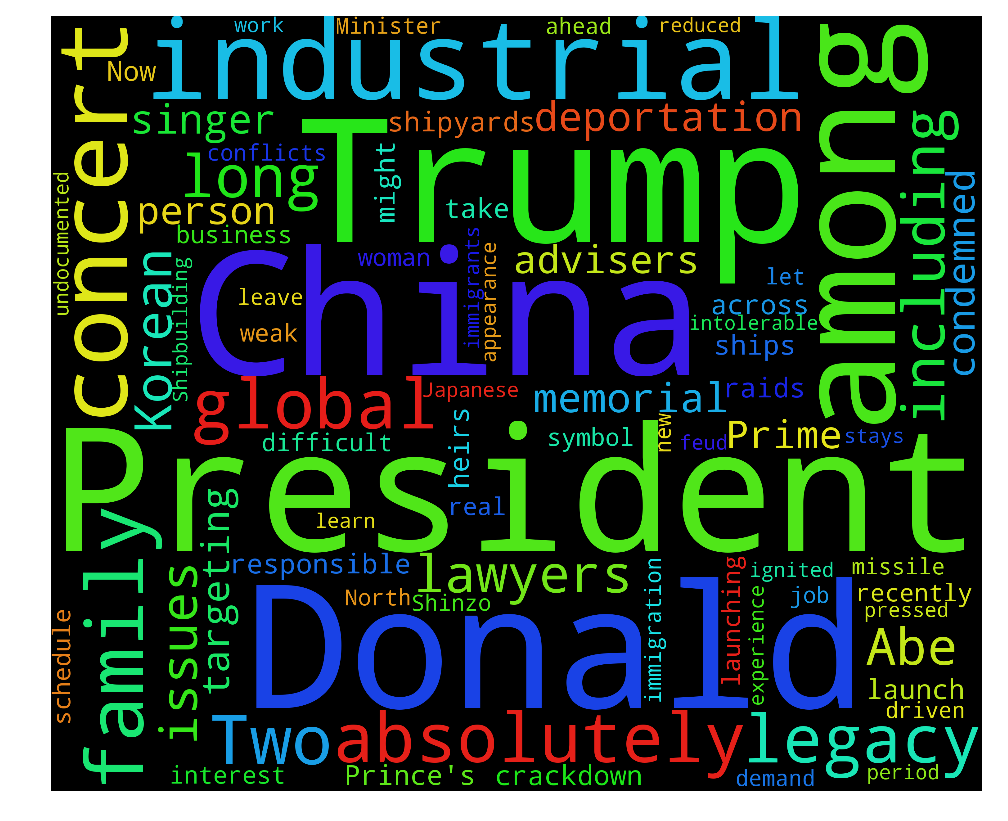

In [21]:
cleaned_word = " ".join([word for word in words_statuses.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()